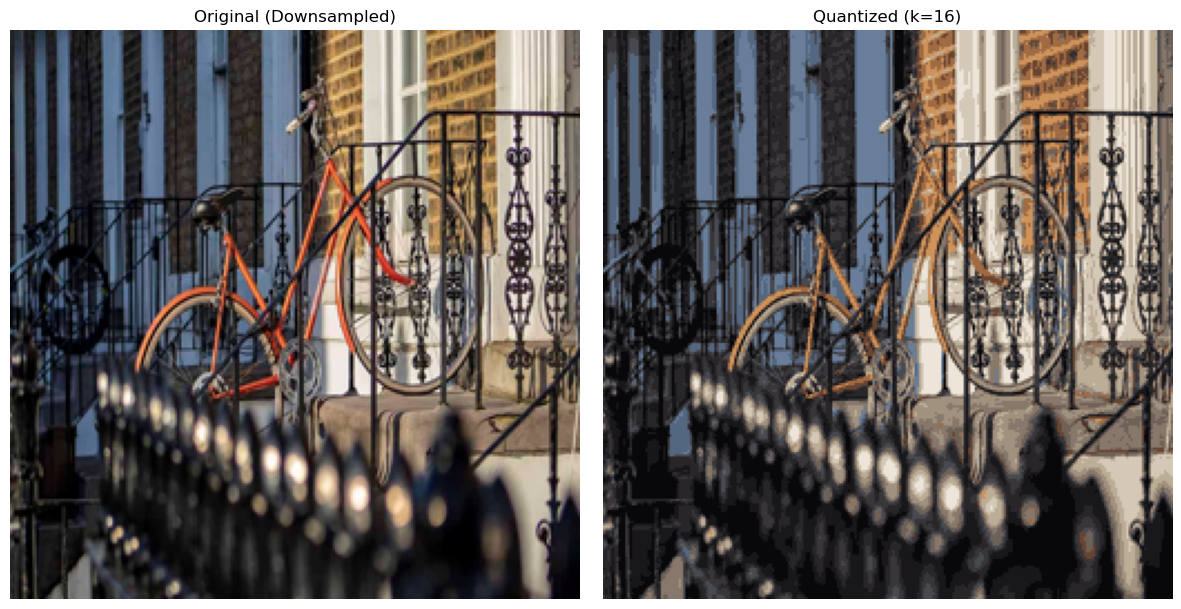

Quantized image saved to: D:\sem 6\DIP\L01 images\quantized_BlurImg01_K16.png


In [5]:
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

IMAGE_PATH = r"D:\sem 6\DIP\L01 images\Blur Img 01.png"
DOWNSAMPLE_SIZE = (256, 256)
K = 16
OUTPUT_PATH = os.path.join(os.path.dirname(IMAGE_PATH), f"quantized_BlurImg01_K{K}.png")

img = Image.open(IMAGE_PATH).convert("RGB")
small_img = img.resize(DOWNSAMPLE_SIZE)
arr = np.array(small_img)
h, w, c = arr.shape
pixels = arr.reshape(-1, 3).astype(np.float32)

kmeans = KMeans(n_clusters=K, n_init=10, random_state=0)
labels = kmeans.fit_predict(pixels)
centers = kmeans.cluster_centers_.astype(np.uint8)

quantized_pixels = centers[labels]
quantized_image = quantized_pixels.reshape(h, w, 3)
quantized_image_pil = Image.fromarray(quantized_image)
quantized_image_pil.save(OUTPUT_PATH)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(arr)
ax[0].set_title("Original (Downsampled)")
ax[0].axis("off")
ax[1].imshow(quantized_image)
ax[1].set_title(f"Quantized (k={K})")
ax[1].axis("off")
plt.tight_layout()
plt.show()

print("Quantized image saved to:", OUTPUT_PATH)
